In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
%matplotlib inline

In [3]:
#this is the same data that ahs been used for Logistic Regressio Case study. To know more abot the data
#refer to the Logistic regression case study
df=pd.read_csv("quality.csv")#read the csv into python
print (df.columns)
print (df.shape)

Index(['MemberID', 'InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines', 'StartedOnCombination',
       'AcuteDrugGapSmall', 'PoorCare'],
      dtype='object')
(131, 14)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["DaysSinceLastERVisit","Narcotics"]],df['PoorCare'],test_size=0.3,random_state=0)

In [5]:
from sklearn import tree
mycols=["DaysSinceLastERVisit","Narcotics"]

In [6]:
cl_tree=tree.DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=12,min_samples_leaf=10)
#the below 2 parameters can be used to control for Overfitting. Try to play around with these
#and come up with a better model
#max_depth=5 --- defines the depth of the tree.. More depth may lead to Overfitting
#min_samples_leaf=8--- defines when the splitting will stop. here for example
# if a node/BUCKET has less than 8 data pints, it will not go for a further split. This too wil control
#overfitting. Smaller thsi value, more the overfitting.

In [7]:
cl_tree=cl_tree.fit(X_train,y_train)

In [8]:
#lets first predict on the train data
pred_train=cl_tree.predict(X_train)
#for the confusion matrix
print (pd.crosstab(y_train,pred_train))
# since we gave a very small depth &/or Very large value of min_samples_leaf, the Model is Underfit
#it is going for very fewer spilts.... If we see below it is not even predicitng a 1. 
#Its only predicting 0's.

Accuracy_train=72.0/(67+24.0)
print (Accuracy_train) #74%

col_0      0  1
PoorCare       
0         63  4
1         15  9
0.7912087912087912


In [9]:
#download graphviz from here and install on your sustem
#https://graphviz.gitlab.io/_pages/Download/Download_windows.html
#graphviz-2.38.msi.this has to be downloaded
#then go to my computer properties--> advanced system settings--> Environment variables
#NEW -->
#variable name ---  PATH
#variable value  -----   C:\Program Files (x86)\Graphviz2.38\bin

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus#pip install pydotplus

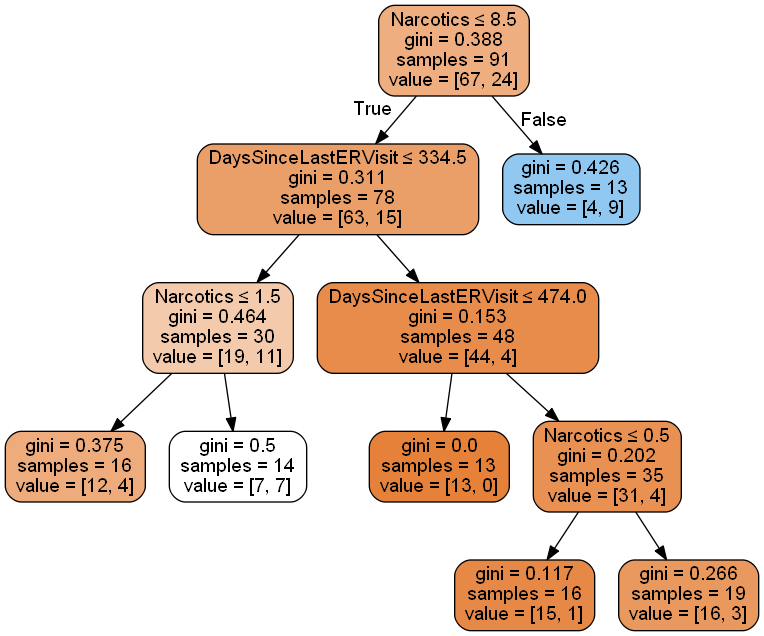

In [12]:
dot_data = StringIO()
export_graphviz(cl_tree, out_file=dot_data, feature_names=mycols, 
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())
#graph.write_png('tree_1.png')

In [33]:
#This wouold give you a PNG image in your working directory
#Lets understand the tree
#First is A variables and a decisio on it
#Second is the value of gini index
#Third is the # of data points in the sample
# Forth is the [# of 0's , # of 1's]

In [14]:
#use the tree to make prediction
pred=cl_tree.predict(X_test)
#for the confusion matrix
print (pd.crosstab(y_test,pred))
Accuracy_test=(31.0)/(31+9.0)
print (Accuracy_test)

col_0      0  1
PoorCare       
0         29  2
1          5  4
0.775


In [35]:
#so we Got 73% on train & 77% on Test.... Both are comparable. But since no 1's are getting predicted
#it means it is a very simple... or underfot model..lets increease the DEPTH and decrease 
#min_samples_leaf to maek the tree more complex... Look at the Imarges formed to verify

In [16]:
cl_tree2=tree.DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=12,min_samples_leaf=3)
#THIS MEANS IT WILL GO ON SPLITITNG AS LONG AS IT EITHER REACHES A DEPTH OF 12 OR IT HAS LESS THAN
#3 POINTS IN THE BUCKET......
cl_tree2=cl_tree2.fit(X_train,y_train)
#lets first predict on the train data
pred_train=cl_tree2.predict(X_train)
#for the confusion matrix
print (pd.crosstab(y_train,pred_train))
Accuracy_train=(64.0+14)/(64+14.0+10+3)
print (Accuracy_train) #85.7% better Than before.But we shud make sure performace is good in test as wel
print ("*****************")
dot_data = StringIO()
export_graphviz(cl_tree2, out_file=dot_data, feature_names=mycols, 
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())
#graph.write_png('tree_2.png')
#use the tree to make prediction o test
pred2=cl_tree2.predict(X_test)
#for the confusion matrix
print (pd.crosstab(y_test,pred2))
Accuracy_test=(28.0+4)/(28+4+5+3.0)
print (Accuracy_test)#80% on test which is quit  #e good...

col_0      0   1
PoorCare        
0         64   3
1         10  14
0.8571428571428571
*****************
col_0      0  1
PoorCare       
0         28  3
1          5  4
0.8


In [ ]:
#So these parameters are good to freeze as the accuracy is consistently higher in bith train & test
# Decision tree works weel if # of data points are huge...in 1000's. 
# this data is preety small and only for illustration purpose....

# Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score

In [31]:
features = mycols

depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)#clf is the tree model
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.7234950120399037), (4, 0.688923288613691), (5, 0.6666322669418645), (6, 0.6882696938424492), (7, 0.6672170622635019), (8, 0.7569659442724459), (9, 0.768077055383557), (10, 0.768077055383557), (11, 0.779188166494668), (12, 0.7340901272789818), (13, 0.7340901272789818), (14, 0.7576195390436877), (15, 0.7576195390436877), (16, 0.7365669074647403), (17, 0.7365669074647403), (18, 0.7365669074647403), (19, 0.7365669074647403)]


In [19]:
#the best value of max depth after cross validation is 3. We build a final model using this value..

In [23]:
final_tree=tree.DecisionTreeClassifier(max_depth=3)
final_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
pred=final_tree.predict(X_test)

In [26]:
pd.crosstab(y_test,pred)

col_0,0,1
PoorCare,,
0,30,1
1,6,3


In [27]:
Accuracy=33.0/(33+7)

In [29]:
print(Accuracy)

0.825
